Ad. zad 1

a) Stała C ma wpływ na szerokość marinesu, który otrzymujemy w ramach klasyfikacji oraz na liczbę poprawnie lub błędnie przypisanych elementów zbioru uczącego. Zależy nam na doborze optymalnego C, ktore może dopuszczać niewielkie pomyłki, ale za to ma duży margines ułatwiający klasyfikację nowych elementów.

b) Może być klasyfikatorem liniowym, jeśli możliwy jest taki podział naszego zbioru uczącego. Dla danych, które nie są separowalne liniowo stosujemy metody jądrowe.

c) Poprawne oddzielenie przykładów uczących zależy od użytej funkcji jądrowej:
- wielomianowa - nie zawsze uda się poprawnie odseparować dane
- radialna - nawet jak uda się poprawnie odseparować wszystkie dane to jest duże ryzyko przeuczenia klasyfikatora i marnych wyników na zbiorze testowym.

Ad. zad 3

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

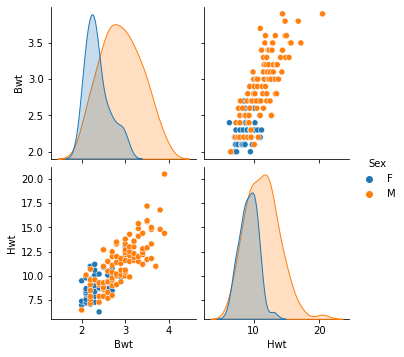

In [ ]:
cats = pd.read_csv("cats.csv")
print(cats.head())
print(cats.describe())
sns.pairplot(cats, hue = "Sex", vars = ["Bwt", "Hwt"])
plt.show()

a) Zmienne ciągłe Bwt i Hwt oraz zmienna nominalna nieuporządkowana sex
b) Nisko. Jeżeli Bwt i Hwt będą odpowiednio wysokie możemy założyć, że to kocur (M). Jeśli wartości będą niskie to nie jesteśmy w stanie odróżnić czy to kotka czy kot.

Ad. zad 4

In [ ]:
def plotCats(X, Y, res):
    y = Y.copy()
    y[y=='F'] = 0
    y[y=='M'] = 1
    x_min, x_max = X["Bwt"].min() - .5, X["Bwt"].max() + .5
    y_min, y_max = X["Hwt"].min() - .5, X["Hwt"].max() + .5
    h = .02     
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    predictions = res.predict(np.c_[xx.ravel(), yy.ravel()])

    predictions = predictions.reshape(xx.shape)

    predictions[predictions=='F'] = 0
    predictions[predictions=='M'] = 1

    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, predictions, 1, cmap="RdBu",
                      vmin=0, vmax=1)

    ax_c = f.colorbar(contour)
    ax_c.set_label("Decision class")

    ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y, s=55,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="black", linewidth=1)

    ax.set(
       xlim=(x_min, x_max), ylim=(y_min, y_max),
       xlabel="Bwt", ylabel="Hwt")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


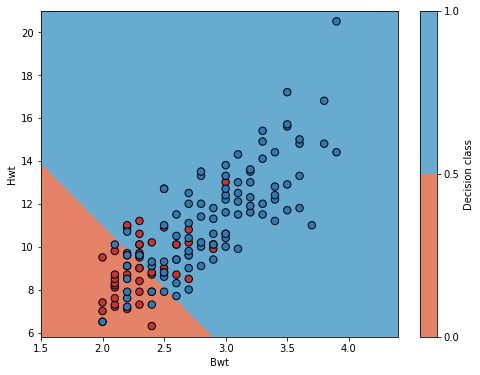

In [ ]:
X = cats[["Bwt", "Hwt"]]
y = cats["Sex"].copy()

mdl = LogisticRegression(C = 0.5) #parametr kosztu
resLG = mdl.fit(X, y)
plotCats(X, y, resLG)

Niezależnie od wysokości kosztu (C), regresja logistyczna nie będzie wystarczająca do klasyfikacji płci kotów na podstawie Bwt i Hwt. W tym przypadku klasyfikacja liniowa nie wystarczy.

Ad. zad 5

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


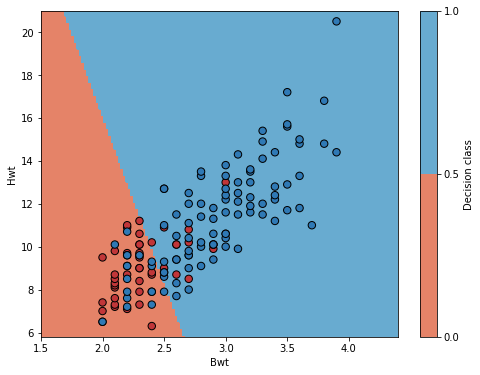

In [ ]:
from sklearn import svm

mdl = svm.SVC(C = 0.5, kernel = 'linear')
resSVM = mdl.fit(X, y)
plotCats(X, y, resSVM)

Wyniki są bardzo zbliżone jak przy regresji logistycznej. 

In [ ]:
?svm.SVC

Ad. zad 6

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


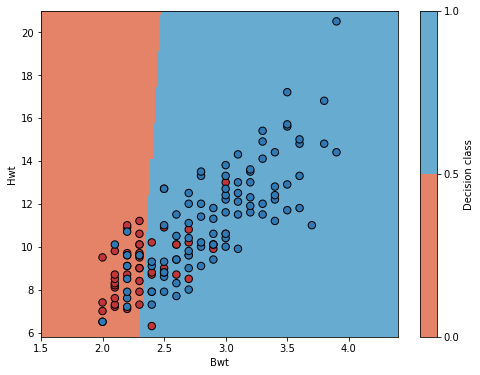

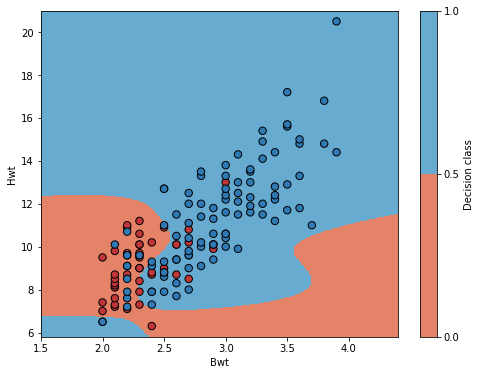

In [ ]:
# kernel = 'linear'
mdl = svm.SVC(C = 1000000, kernel = 'linear')
resSVM = mdl.fit(X, y)
plotCats(X, y, resSVM)

# kernel = 'rbf'
mdl = svm.SVC(C = 1000000, kernel = 'rbf')
resSVM = mdl.fit(X, y)
plotCats(X, y, resSVM)

Zmiany wartości C w przypadku RBF są dużo bardziej zauważalne niż przy funkcji liniowej (gdzie niewiele się zmenia mimo różnic C). Wraz ze wzrostem wartości C radialna funkcja bazowa coraz lepiej klasyfikuje obie grupy, wyraźnie dopasowuje sie do danych.

In [ ]:
predictions = resSVM.predict(X)
predictions

array(['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'M',
       'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M'], dtype=object)

In [ ]:
from sklearn import metrics
# ?metrics.confusion_matrix
# ?metrics.classification_report

print(metrics.confusion_matrix(y, predictions, labels = ["F", "M"] ))
print(metrics.classification_report(y, predictions,labels = ["F", "M"] ))

[[31 16]
 [12 85]]
              precision    recall  f1-score   support

           F       0.72      0.66      0.69        47
           M       0.84      0.88      0.86        97

    accuracy                           0.81       144
   macro avg       0.78      0.77      0.77       144
weighted avg       0.80      0.81      0.80       144



In [ ]:
print(metrics.accuracy_score(y, predictions))
print(metrics.balanced_accuracy_score(y,predictions))

0.8055555555555556
0.7679315639394604


Szczególnie istotne będą: odzysk (pacjent mający nowotwór był zdiagnozowany jako zdrowy i nie jest dalej badany, co ostatecznie może zagrażać życiu) -> maksymalizujemy Recall. Chcemy uniknąć klasyfikacji fałszywie negatywnych (FN)


Ad. Zad 7

In [ ]:
#Z wagami
weights = {"F":1, "M":(np.count_nonzero(y=="M")/np.count_nonzero(y))}
print(weights)
mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 1, class_weight = weights)
resSVM = mdl.fit(X, y)
predictions = resSVM.predict(X)
print(metrics.confusion_matrix(y, predictions, labels=["F", "M"]))
print(metrics.classification_report(y, predictions))

In [ ]:
#bez ważenia
mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 1)
resSVM = mdl.fit(X, y)
predictions = resSVM.predict(X)
print(metrics.confusion_matrix(y, predictions, labels=["F", "M"]))
print(metrics.classification_report(y, predictions))

[[36 11]
 [15 82]]
              precision    recall  f1-score   support

           F       0.71      0.77      0.73        47
           M       0.88      0.85      0.86        97

    accuracy                           0.82       144
   macro avg       0.79      0.81      0.80       144
weighted avg       0.82      0.82      0.82       144



Ad.  Zad 8

[[39  8]
 [ 6 91]]
              precision    recall  f1-score   support

           F       0.87      0.83      0.85        47
           M       0.92      0.94      0.93        97

    accuracy                           0.90       144
   macro avg       0.89      0.88      0.89       144
weighted avg       0.90      0.90      0.90       144



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


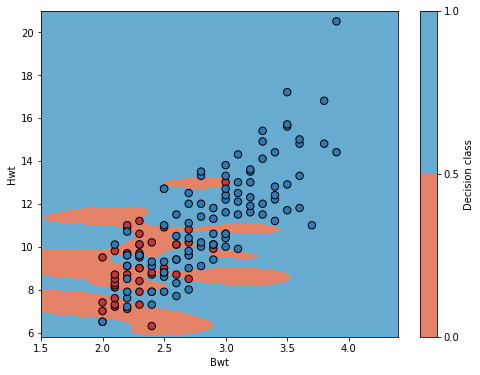

In [ ]:
# gamma {0.1, 1, 5, 50, 500}

mdl = svm.SVC(C = 100, kernel = 'rbf', gamma = 5)
resSVM = mdl.fit(X, y)
predictions = resSVM.predict(X)
print(metrics.confusion_matrix(y, predictions, labels=["F", "M"]))
print(metrics.classification_report(y, predictions))
plotCats(X, y, resSVM)

  Z przebadanych wartości gamma najbardziej skłaniam sie do gamma = 5. Ma dobre statystyki i spore pola decyzyjne.

Gamma = 50 daje najlepsze statystyki klasyfikacji, jednak granice decyzyjne bardzo dopasowują się do punktów. z takimi wynikami nasz model może być przeuczony, co skutkuje mniejszą elastycznością dla nowych danych.


Ad. zad 9

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train, X_test)
print(y_train, y_test)

     Bwt   Hwt
94   2.9   9.4
23   2.3   9.5
15   2.2   9.7
127  3.4  12.4
116  3.2  12.3
..   ...   ...
74   2.6   9.4
7    2.1   8.2
43   2.9  10.1
132  3.5  15.6
28   2.3  10.6

[100 rows x 2 columns]      Bwt   Hwt
89   2.8  10.2
141  3.8  16.8
10   2.1   8.7
50   2.2   7.2
55   2.2   9.6
125  3.4  11.2
87   2.8   9.1
66   2.5   8.8
58   2.3   9.6
20   2.3   8.4
90   2.8  11.4
30   2.4   6.3
85   2.7  12.0
102  3.0  11.6
11   2.1   9.8
9    2.1   8.5
22   2.3   9.0
44   2.9  10.1
143  3.9  20.5
75   2.6   9.4
124  3.3  15.4
123  3.3  14.9
31   2.4   8.7
53   2.2   8.5
25   2.3   9.7
120  3.3  11.5
109  3.1  11.5
48   2.0   6.5
64   2.5   7.9
54   2.2   9.1
131  3.5  12.9
134  3.5  17.2
34   2.5   9.0
68   2.5   9.3
79   2.7   9.0
33   2.4  10.2
110  3.1  12.1
59   2.4   7.3
37   2.6  10.1
137  3.6  14.8
21   2.3   9.0
3    2.1   7.2
107  3.0  13.8
105  3.0  12.7
94     M
23     F
15     F
127    M
116    M
      ..
74     M
7      F
43     F
132    M
28     F
Name: Sex, Length: 100

[[10  4]
 [ 7 23]]
              precision    recall  f1-score   support

           F       0.59      0.71      0.65        14
           M       0.85      0.77      0.81        30

    accuracy                           0.75        44
   macro avg       0.72      0.74      0.73        44
weighted avg       0.77      0.75      0.76        44



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


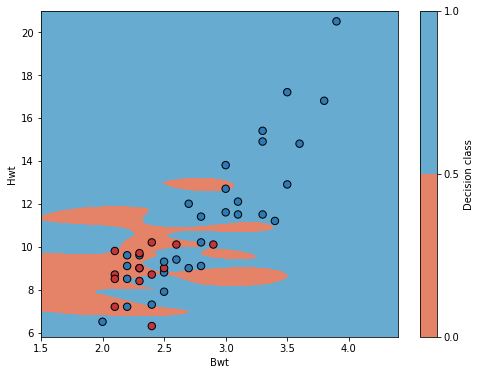

In [ ]:
mdl = svm.SVC(C = 100, kernel = 'rbf', gamma = 5)
resSVM = mdl.fit(X_train, y_train)
predictions = resSVM.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions, labels=["F", "M"]))
print(metrics.classification_report(y_test, predictions))
plotCats(X_test, y_test, resSVM)

[[30  3]
 [ 3 64]]
              precision    recall  f1-score   support

           F       0.91      0.91      0.91        33
           M       0.96      0.96      0.96        67

    accuracy                           0.94       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.94      0.94      0.94       100



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


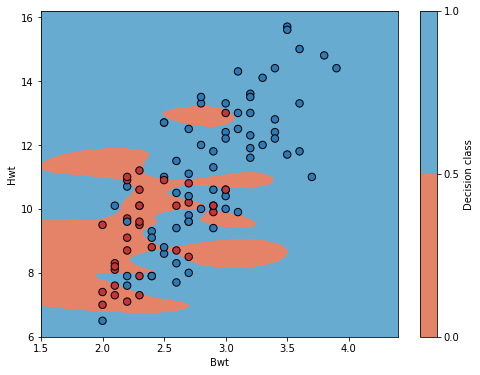

In [ ]:
predictions = resSVM.predict(X_train)
print(metrics.confusion_matrix(y_train, predictions, labels=["F", "M"]))
print(metrics.classification_report(y_train, predictions))
plotCats(X_train, y_train, resSVM)

Statystyki klasyfikacji dla samego zbioru testowego są dużo niższe niż dla zbioru treningowego. Przy zmianie gamma na 1, trochę się poprawiają. Różnica wynika z samego podziału, uczymy na innych danych niż testujemy więc dobór parametrów będzie wymagał czasu. Powinniśmy dążyć do accuracy testowego zbliżonego do treningowego.

Ad. zad 10

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 1)
cv = KFold(n_splits=7, shuffle=True)
scores = cross_val_score(mdl, X, y, scoring='accuracy', cv=cv)
print('Accuracy: %.3f' % (np.mean(scores)))

Accuracy: 0.722


In [ ]:
from sklearn.model_selection import RepeatedKFold
mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 1)
cv = RepeatedKFold(n_splits=7, n_repeats=10)
scores = cross_val_score(mdl, X, y, scoring='accuracy', cv=cv)
print('Accuracy: %.3f' % (np.mean(scores)))

Accuracy: 0.734


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


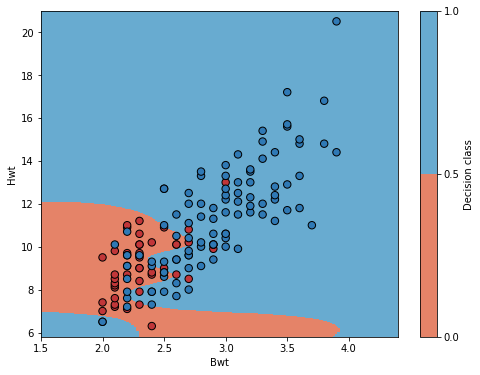

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = dict()
parameters["C"] = [1, 10, 100, 1000]
parameters["gamma"] = [1, 10, 100]
cv = KFold(n_splits=7, shuffle=True)
mdl = svm.SVC()
gridMdl = GridSearchCV(mdl, parameters, scoring='accuracy', cv=cv,
refit=True)
resMdls = gridMdl.fit(X, y)
bestMdl = resMdls.best_estimator_
bestMdl
plotCats(X, y, bestMdl)
predictions = bestMdl.predict(X)

In [ ]:
print(metrics.confusion_matrix(y, predictions, labels=["F", "M"]))
print(metrics.classification_report(y, predictions))

[[37 10]
 [16 81]]
              precision    recall  f1-score   support

           F       0.70      0.79      0.74        47
           M       0.89      0.84      0.86        97

    accuracy                           0.82       144
   macro avg       0.79      0.81      0.80       144
weighted avg       0.83      0.82      0.82       144



Po tuningu accuracy jest wyższe niż w poprzednich przykładach gdzie stosowaliśmy same k-krotne walidacje krzyżowe

Ad. zad 11

In [6]:
defaults = pd.read_csv("defaults.csv", sep = ";")
defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Klasy decyzyjne prawdopodobnie nie są zbalansowane, ale po wyborze cech do klasyfikacji zastosuję przypisanie wag. Wykorzystanie wszystkich atrybutów może wpłynąć na poprawność klasyfikacji. Użycie wszystkich 25 cech niepotrzebnie wydłużyłoby czas pracy algorytmu. Przykładowo ID w ogóle nie ma wpływu na decyzję, a mogłoby wprowadzić chaos lub wpłynąć na Accuracy. Do mojej klasyfikacji wykorzystam Age i PAY_0. 

In [7]:
defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,27999.00000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,...,27999.000000,27999.000000,27999.000000,27999.000000,2.799900e+04,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000
mean,14000.00000,167099.170685,1.604557,1.845780,1.556484,35.380264,-0.010572,-0.130112,-0.163292,-0.217472,...,43222.489696,40387.979856,38903.331155,5579.850923,5.847387e+03,5131.236580,4813.350048,4755.416801,5184.075574,0.221794
std,8082.75943,129742.554832,0.488954,0.785705,0.521295,9.276226,1.122965,1.194718,1.195233,1.163331,...,64235.169551,60759.487603,59435.211063,15162.343572,2.105127e+04,16606.364862,15307.325671,14887.656280,17602.985657,0.415460
min,1.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7000.50000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2378.000000,1799.500000,1268.000000,1000.000000,8.395000e+02,390.000000,295.000000,264.000000,109.000000,0.000000
50%,14000.00000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19129.000000,18239.000000,17212.000000,2100.000000,2.008000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,20999.50000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54391.000000,50150.500000,49165.500000,5005.000000,5.000000e+03,4500.000000,4010.000000,4026.500000,4000.000000,0.000000
max,27999.00000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,417990.000000,528666.000000,1.000000


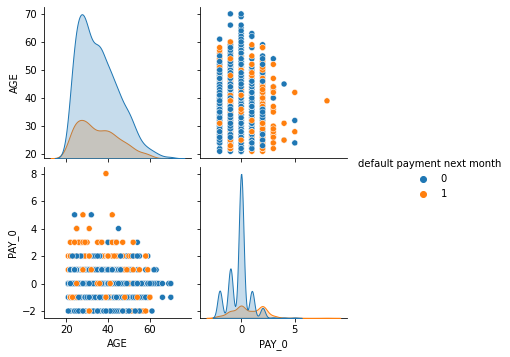

In [8]:
smplDfl = defaults.sample(n = 2000)
sns.pairplot(smplDfl, hue = "default payment next month", vars = ["AGE", "PAY_0"])
plt.show()

In [9]:
X = smplDfl[["AGE", "PAY_0"]]
y = smplDfl["default payment next month"]

In [10]:
from sklearn import svm
from sklearn import metrics
mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 1)
resSVM = mdl.fit(X, y)
predictions = resSVM.predict(X)
print(metrics.confusion_matrix(y, predictions, labels=[0, 1]))
print(metrics.classification_report(y, predictions))

[[1507   47]
 [ 280  166]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1554
           1       0.78      0.37      0.50       446

    accuracy                           0.84      2000
   macro avg       0.81      0.67      0.70      2000
weighted avg       0.83      0.84      0.81      2000



Podzielę moją próbkę zbioru na część treningową i testową w proporcji 7:3. Przy decyzji o najlepszym modelu będę kierowała się wysoką wartością Accuracy, ponieważ jej wartość bierze pod uwagę również wartości True Negative, co w tym przypadku oznacza prawidłowo rozpoznane osoby, które opłacą następną ratę. Tacy klienci mogą zostać pominięci np. w późniejszych (kosztownych) działaniach odzyskiwania należności. Oczywiście to moje przypuszczenia, realnie to zależy od celów i potrzeb adresata dla którego szukamy optymalnych parametrów modelu.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train, X_test)
print(y_train, y_test)


       AGE  PAY_0
7048    44      3
16951   56      0
1729    41      1
26991   31      0
4355    52      0
...    ...    ...
21514   25      0
14277   47      1
12099   40      0
3473    35      0
11198   32      0

[1400 rows x 2 columns]        AGE  PAY_0
24903   30      0
26943   37      1
20449   26      0
22004   26     -1
19729   35      0
...    ...    ...
21265   50      0
21714   24     -1
11969   35      0
19083   32      2
13254   25      1

[600 rows x 2 columns]
7048     1
16951    0
1729     0
26991    0
4355     0
        ..
21514    0
14277    0
12099    0
3473     0
11198    0
Name: default payment next month, Length: 1400, dtype: int64 24903    0
26943    1
20449    0
22004    0
19729    0
        ..
21265    0
21714    0
11969    0
19083    1
13254    0
Name: default payment next month, Length: 600, dtype: int64


In [47]:
mdl = svm.SVC(C = 10, kernel = 'rbf', gamma = 5)
resSVM = mdl.fit(X_train, y_train)
predictions = resSVM.predict(X_train)
print(metrics.confusion_matrix(y_train, predictions, labels=[1, 0]))
print(metrics.classification_report(y_train, predictions))

predictions = resSVM.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions, labels=[1, 0]))
print(metrics.classification_report(y_test, predictions))

[[ 118  204]
 [  23 1055]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1078
           1       0.84      0.37      0.51       322

    accuracy                           0.84      1400
   macro avg       0.84      0.67      0.71      1400
weighted avg       0.84      0.84      0.81      1400

[[ 27  97]
 [ 15 461]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       476
           1       0.64      0.22      0.33       124

    accuracy                           0.81       600
   macro avg       0.73      0.59      0.61       600
weighted avg       0.79      0.81      0.77       600



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


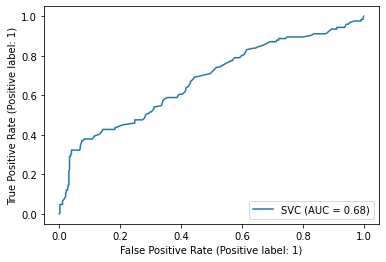

In [48]:
from sklearn import metrics

metrics.plot_roc_curve(mdl, X_test, y_test)

In [49]:
valid = pd.read_csv("defaults_valid.csv", sep = ";")

X_valid = valid[["AGE", "PAY_0"]]
y_valid = valid["default payment next month"]

mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 1)
resSVM = mdl.fit(X_valid, y_valid)
predictions = resSVM.predict(X_valid)
print(metrics.confusion_matrix(y_valid, predictions, labels=[0, 1]))
print(metrics.classification_report(y_valid, predictions))

[[1546   29]
 [ 286  140]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1575
           1       0.83      0.33      0.47       426

    accuracy                           0.84      2001
   macro avg       0.84      0.66      0.69      2001
weighted avg       0.84      0.84      0.81      2001



In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
mdl = svm.SVC(C = 10, kernel = 'rbf', gamma = 5)
cv = KFold(n_splits=7, shuffle=True)
scores = cross_val_score(mdl, X, y, scoring='accuracy', cv=cv)
print('Accuracy: %.3f' % (np.mean(scores)))

Accuracy: 0.799


Użycie samej k-cross walidacji daje gorsze Accuracy (0,79) przy tych samych parametrach C i gamma niż podział zbioru na część treningową i testową. Po powyższej analizie najlepszą propozycją jest podział zbioru, funkcja jądrowa RBF, C=10, gamma=5 z wynikiem Accuracy 0.84.